In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib import temp_lib
from scipy import fftpack
import numpy.linalg as npl



In [2]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
gdal.UseExceptions()

ds_normal = gdal.Open(Tifpath1)
ds = gdal.Open(Tifpath)
ds_normal1 = np.array(ds_normal.GetRasterBand(1).ReadAsArray())
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())


/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:184: RuntimeWarning: divide by zero encountered in true_divide
  widths = w * self._fs /(2* self._f * np.pi)


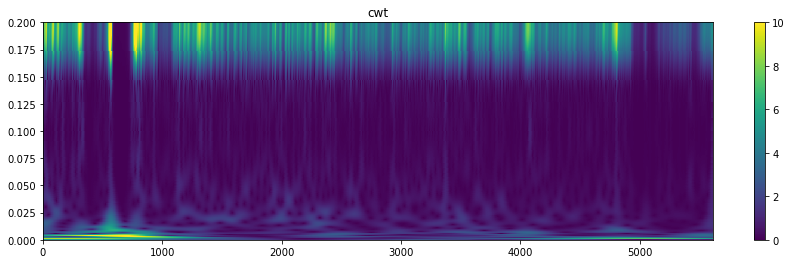

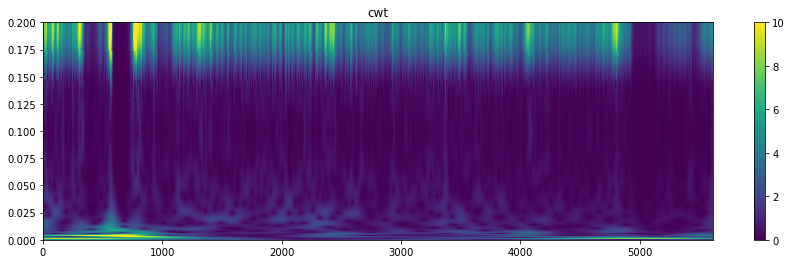

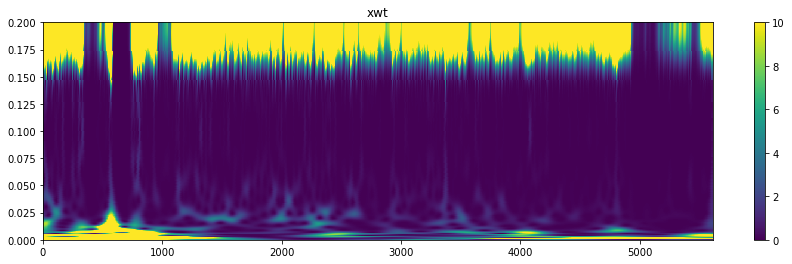

In [3]:

ds_normal11 = ds_normal1[10:-10, 20:-50]
toto = ds_band1[10: -10, 20:-50]/ds_normal11
toto3 = ds_band3[10: -10, 20:-50]/ds_normal11
norm = temp_lib(toto)
norm3 = temp_lib(toto3)

norm.cwt(w =6 , multiplier = 30, vmax = 10)
norm3.cwt(w = 6, multiplier = 30, vmax = 10)

norm.xwt(norm3, vmax = 10)


/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:228: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:229: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._deforestated_band)*10)


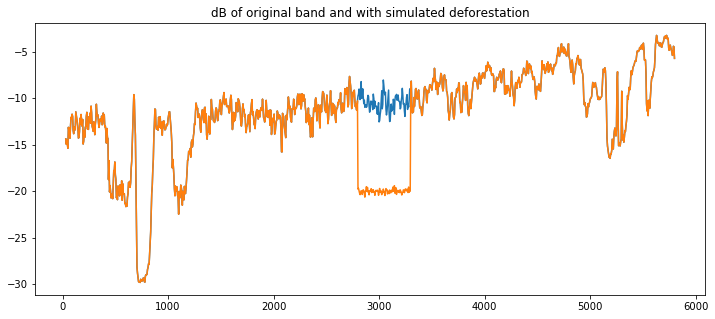

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:232: RuntimeWarning: divide by zero encountered in true_divide
  widths = w * self._fs /(2* self._f * np.pi)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:184: RuntimeWarning: divide by zero encountered in true_divide
  widths = w * self._fs /(2* self._f * np.pi)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:89: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:91: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(other._ds_band)*10)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=

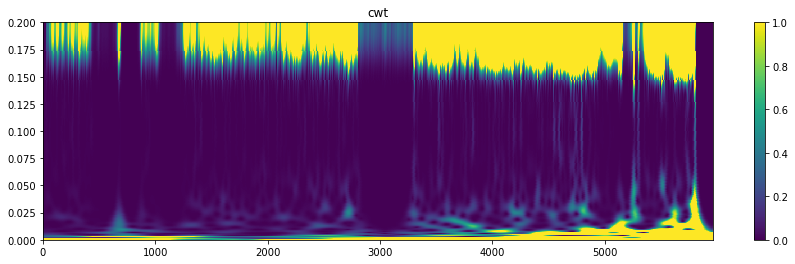

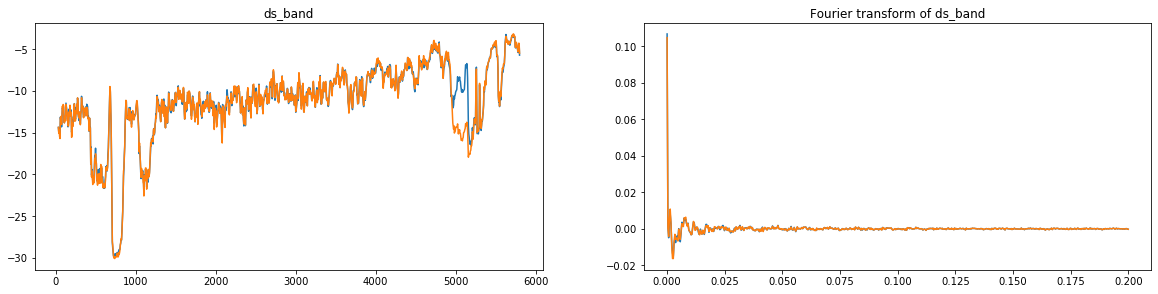

In [9]:
element1 = temp_lib(ds_band1)
element3 = temp_lib(ds_band3)
element1.simulate_deforestation([2800, 3300], mu = 1e-02, sigma = 5e-04 )
#element1.extract_band([200, 220])
#element1.plot_TF()
#element1.cwt(w = 6)
element1.plot_TF(element3)

In [ ]:
help(element1.decrease_resolution)
element1 = temp_lib(ds_band1)
element3 = temp_lib(ds_band3)
element1.plot_TF()
element1.decrease_resolution(15*2)
element1.plot_TF()
element1.cwt()
element3.decrease_resolution(15*2)
element3.cwt()
element1.xwt(element3)

In [ ]:





m = 1000 #signal multiplication

#element1.decrease_resolution(20)
#element1.plot_TF()
element1.extract_band()
element1.plot_TF(element3)
element1._nwin = 35
element3._nwin = 35
element1.spectrogram('tukey', multiplier = m)
element3.spectrogram('tukey', multiplier = m)
element1.cross_spectro(element3)
print(element1._multiplier)

In [ ]:
m = 10
w = 6
element1.cwt(w = w, multiplier = m)
element3.cwt(w = w, multiplier = m)
element1.xwt(element3)


In [ ]:
from how2spectro_Morlet2 import morlet2
from how2spectro_Morlet2 import cwt
#psd = power spectral density welch (signal library)

In [ ]:
'''ds_target1 = np.zeros(len(ds_band1[1000,:]))
ds_target3 = np.zeros(len(ds_band3[1000,:]))

Ny,Nx = np.shape(ds_band3)
x = np.linspace(0,Nx*5,Nx)
y = np.linspace(0,Ny*5,Ny)

ls = 712
le = 728
for i in range(ls,le):
    ds_target1 = ds_band1[i,:] + ds_target1
    ds_target3 = ds_band3[i,:] + ds_target3
ds_target1 = ds_target1/(le-ls)
ds_target3 = ds_target3/(le-ls)
N = len(ds_target1)
length = N*5 # 1 pixel correspond to 5 metres (?)
fs = N/length

Tobs = length
print(Tobs)
d1x = np.arange(N)/float(fs)
x = np.linspace(0,length,N)
xf = np.linspace(0,length*fs/2,N//2)/length
fy = fftpack.fft(ds_target1)[:N//2]/N
fy2 = fftpack.fft(ds_target3)[:N//2]/N

d1fmax = np.max(abs(fy))
d2fmax = np.max(abs(fy2))

w = 10
d1f = np.linspace(d1fmax, d1fmax*10, 2000 )
widths = w*fs / (2*d1f *np.pi)

cwtm1 = cwt(ds_target1bis, morlet2, widths, w = w)*100
cwtm3 = cwt(ds_target3bis, morlet2, widths, w = w)*100

fig3 = plt.figure(3)
plt.pcolormesh(d1x,d1f,np.abs(cwtm1*np.conj(cwtm3)),cmap = 'viridis',vmax = 10)
plt.colorbar()
fig3.show()

'''

In [ ]:
print(np.linspace(0,Tobs, N))
print((np.arange(N)/float(fs)))

In [ ]:
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

ds_normal = gdal.Open(Tifpath1)

ds_band1bis = ds_target1/np.array(ds_normal.GetRasterBand(1).ReadAsArray())
ds_band3bis = ds_target3/np.array(ds_normal.GetRasterBand(1).ReadAsArray())

ds_target1bis = np.zeros(len(ds_band3bis[1000,:]))
ds_target3bis = np.zeros(len(ds_band3bis[1000,:]))

ls1 = 712
le1 = 728
for i in range(ls,le):
    ds_target1bis = ds_band1bis[i,:] + ds_target1bis
    ds_target3bis = ds_band3bis[i,:] + ds_target3bis
ds_target1bis = ds_target1bis/(le1-ls1)
ds_target3bis = ds_target3bis/(le1-ls1)
print(ds_target1bis)


In [ ]:
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'

print(len(ds_band1bis))

normal1 = temp_lib(ds_band1bis)
normal3 = temp_lib(ds_band3bis)

print(ds_band1bis)
m = 100

normal1.cwt()

